Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#name of the CSV file you want to read
df_test = pd.read_csv("Train.csv")
df_train = pd.read_csv("Test.csv")
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [3]:
#Load and explore data
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB
None


In [4]:
df_train.shape

(2627, 11)

In [5]:
df_train.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [6]:
# check if dataframe has null values:
df_train.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [7]:
df_train.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [8]:
#dropping id as it's irrelevant to my task.
df_train.drop("ID", axis=1,inplace=True)
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [9]:
df_train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [10]:
#percentage of missing values
missingvaluepercent= (df_train.isnull().sum() / len(df_train)) * 100
missingvaluepercent

Gender              0.000000
Ever_Married        1.903312
Age                 0.000000
Graduated           0.913590
Profession          1.446517
Work_Experience    10.239817
Spending_Score      0.000000
Family_Size         4.301485
Var_1               1.218120
Segmentation        0.000000
dtype: float64

In [19]:
# Check the number of duplicate values
df_train.duplicated().sum()

1

In [20]:
df_train = df_train.drop_duplicates()

In [21]:
df_train.duplicated().sum()

0

In [22]:
#handling missing values with mode for categorical feature
df_train['Ever_Married'].fillna(df_train['Ever_Married'].mode()[0], inplace=True)
df_train['Graduated'].fillna(df_train['Graduated'].mode()[0], inplace=True)
df_train['Profession'].fillna(df_train['Profession'].mode()[0], inplace=True)
df_train['Var_1'].fillna(df_train['Var_1'].mode()[0], inplace=True)

In [23]:
#handling missing values with median for for numerical variables
df_train['Work_Experience'].fillna(df_train['Work_Experience'].median(), inplace = True)
df_train['Family_Size'].fillna(df_train['Family_Size'].median(),inplace = True)

In [24]:
# check if dataframe has null values:
df_train.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

Data Preprocessing

In [25]:
#changing categorical data into numeric data
def change_gender(gender):
    if gender == 'Male':
        return 1 
    else:
        return 0
df_train['Gender'] = df_train['Gender'].apply(change_gender)

In [26]:
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,1,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,0,Yes,69,No,Artist,0.0,Low,1.0,Cat_6,A
3,1,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,0,No,19,No,Marketing,1.0,Low,4.0,Cat_6,A


In [27]:
#changing 'Ever_Married' and 'Graduated' into numeric data
categorical_features = ['Ever_Married', 'Graduated']  
for i in categorical_features[0:2]:
    df_train[i] = df_train[i].apply(lambda x: 1 if x=='Yes' else 0)
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,1,36,1,Engineer,0.0,Low,1.0,Cat_6,B
1,1,1,37,1,Healthcare,8.0,Average,4.0,Cat_6,A
2,0,1,69,0,Artist,0.0,Low,1.0,Cat_6,A
3,1,1,59,0,Executive,11.0,High,2.0,Cat_6,B
4,0,0,19,0,Marketing,1.0,Low,4.0,Cat_6,A


In [28]:
# Label encoder on Profession feature
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df_train['Profession'])
df_train['Profession'] = y
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,1,36,1,2,0.0,Low,1.0,Cat_6,B
1,1,1,37,1,5,8.0,Average,4.0,Cat_6,A
2,0,1,69,0,0,0.0,Low,1.0,Cat_6,A
3,1,1,59,0,4,11.0,High,2.0,Cat_6,B
4,0,0,19,0,8,1.0,Low,4.0,Cat_6,A


In [29]:
# label encoder for spending score and Var_1
categorical_features = ['Spending_Score','Var_1']
for i in categorical_features:
    le = LabelEncoder()
    y = le.fit_transform(df_train[i])
    df_train[i] = y
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,1,36,1,2,0.0,2,1.0,5,B
1,1,1,37,1,5,8.0,0,4.0,5,A
2,0,1,69,0,0,0.0,2,1.0,5,A
3,1,1,59,0,4,11.0,1,2.0,5,B
4,0,0,19,0,8,1.0,2,4.0,5,A


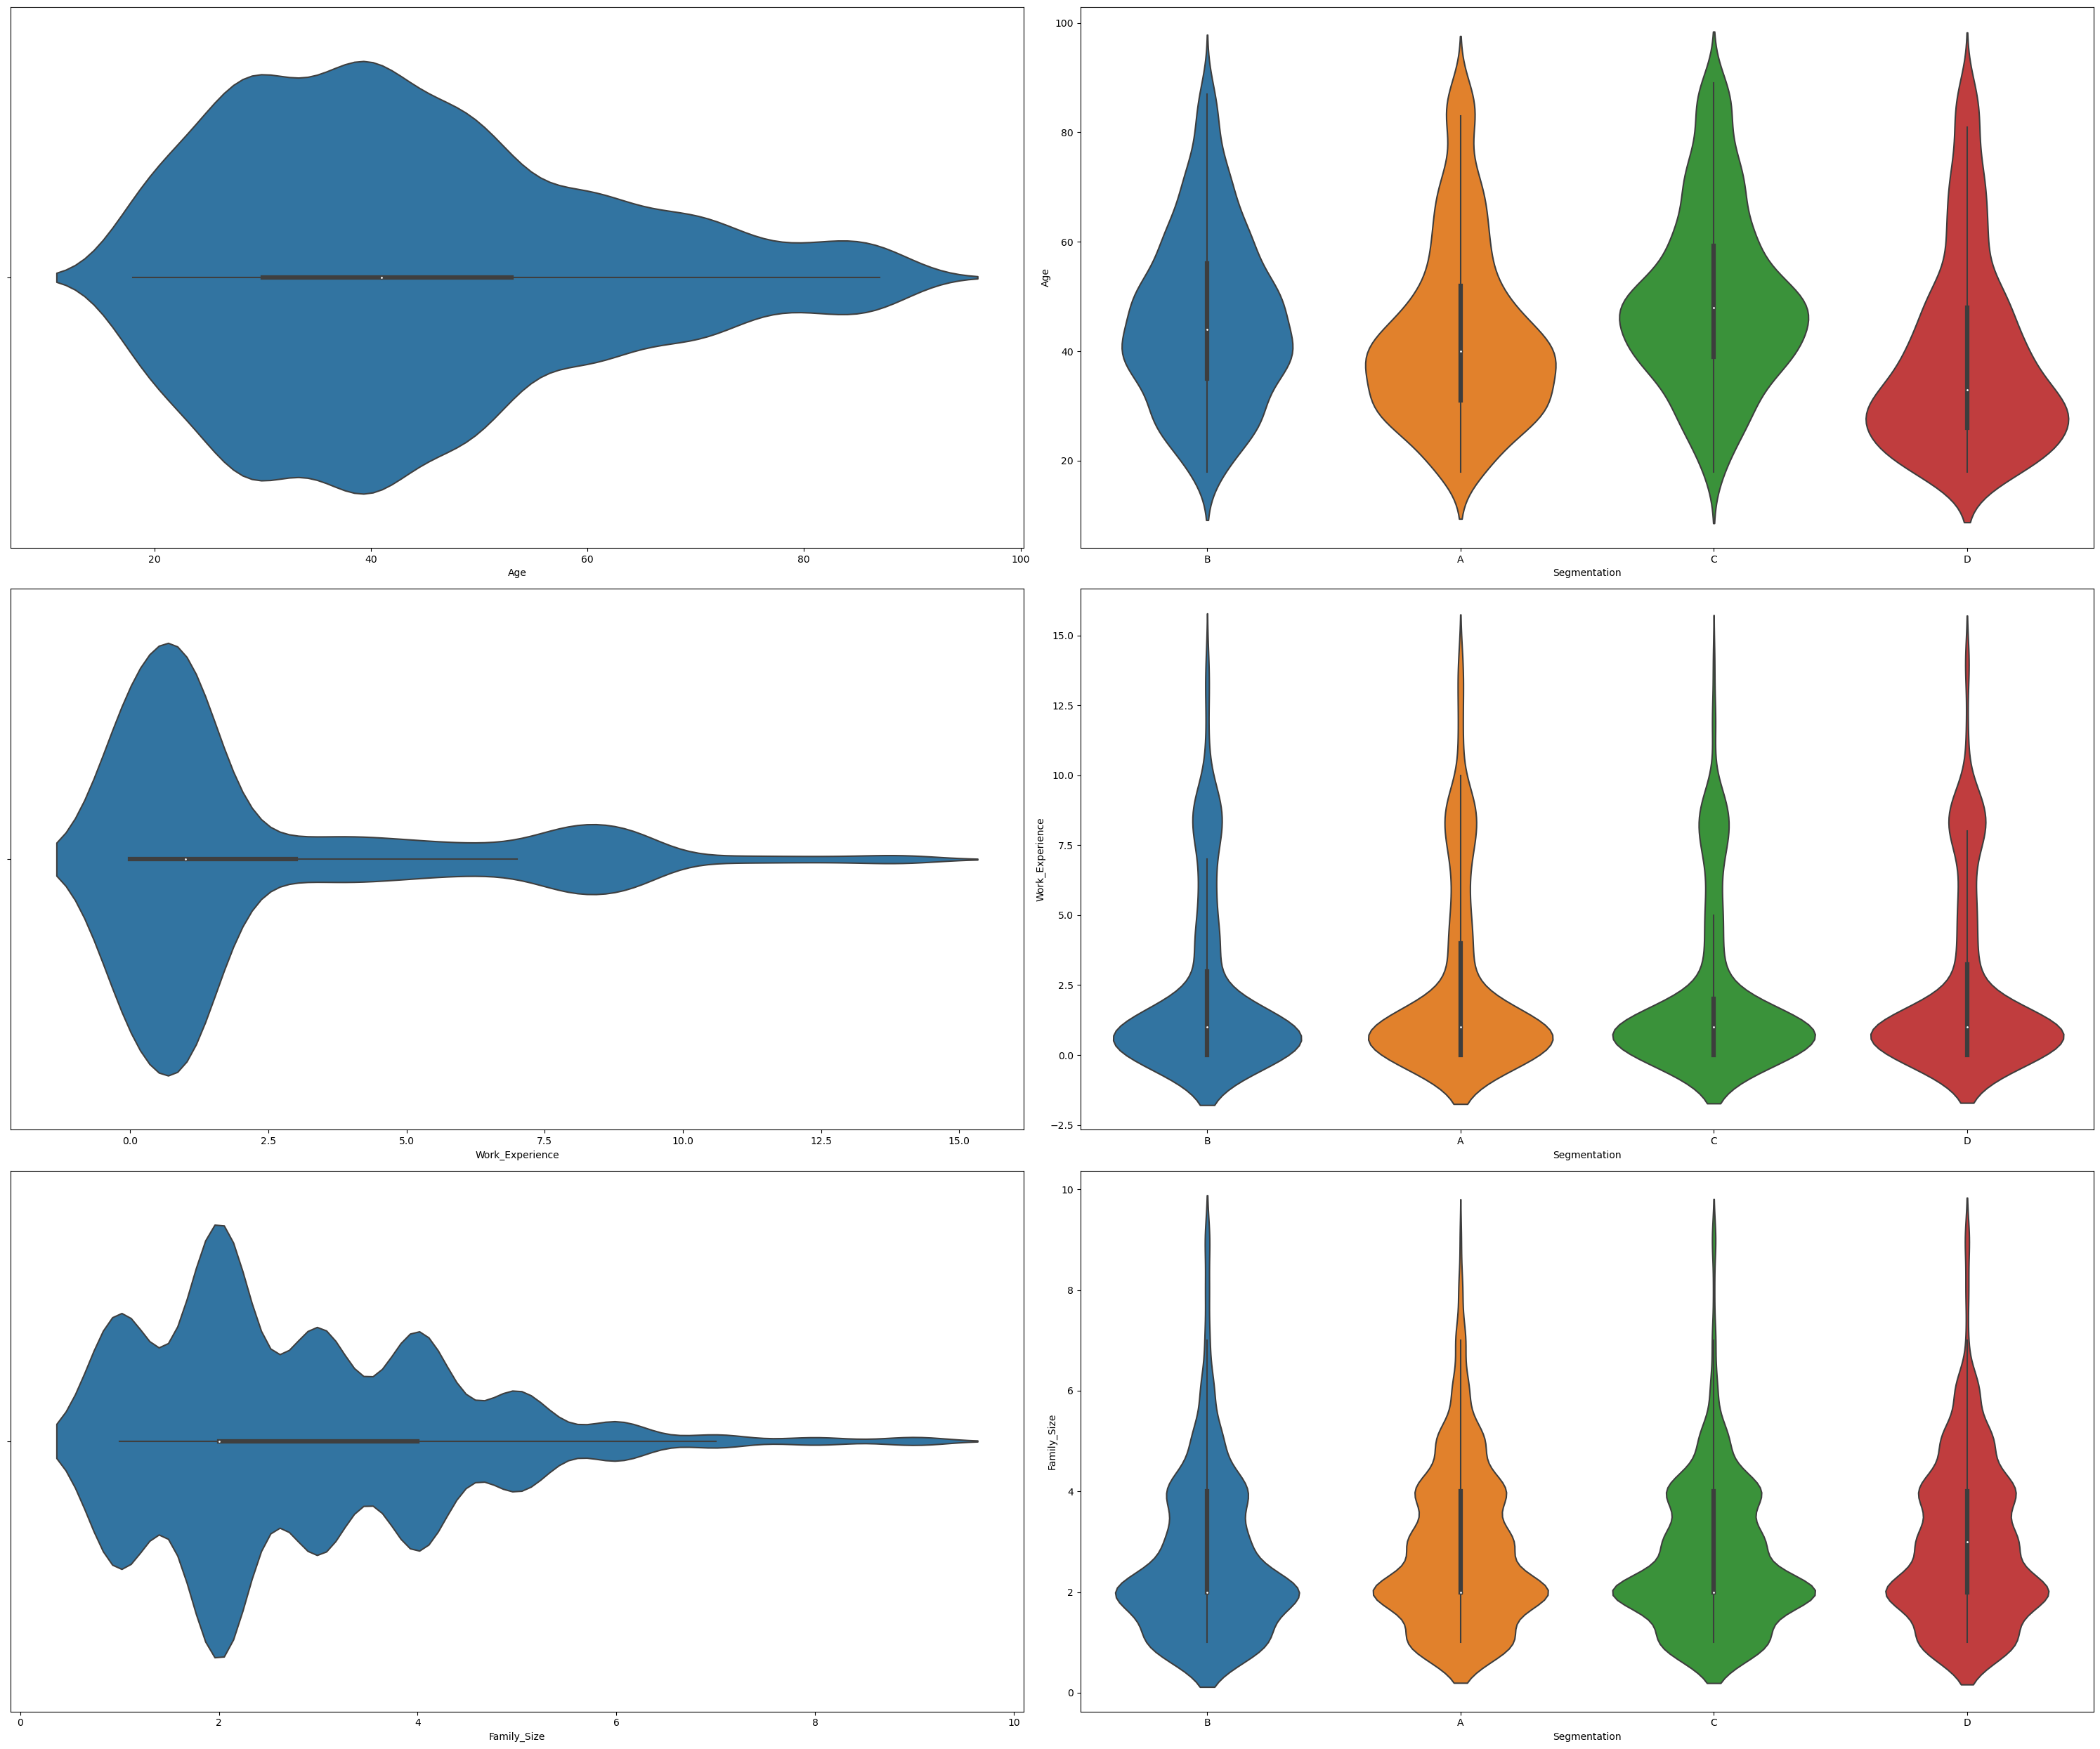

In [30]:
columns = ['Age', 'Work_Experience', 'Family_Size']

fig, axs = plt.subplots(len(columns), 2, figsize=(30, 25))

for i, col in enumerate(columns):
    sns.violinplot(x=df_train[col], ax=axs[i, 0])
    sns.violinplot(x='Segmentation', y=df_train[col], data=df_train, ax=axs[i, 1])

plt.tight_layout()
plt.show()

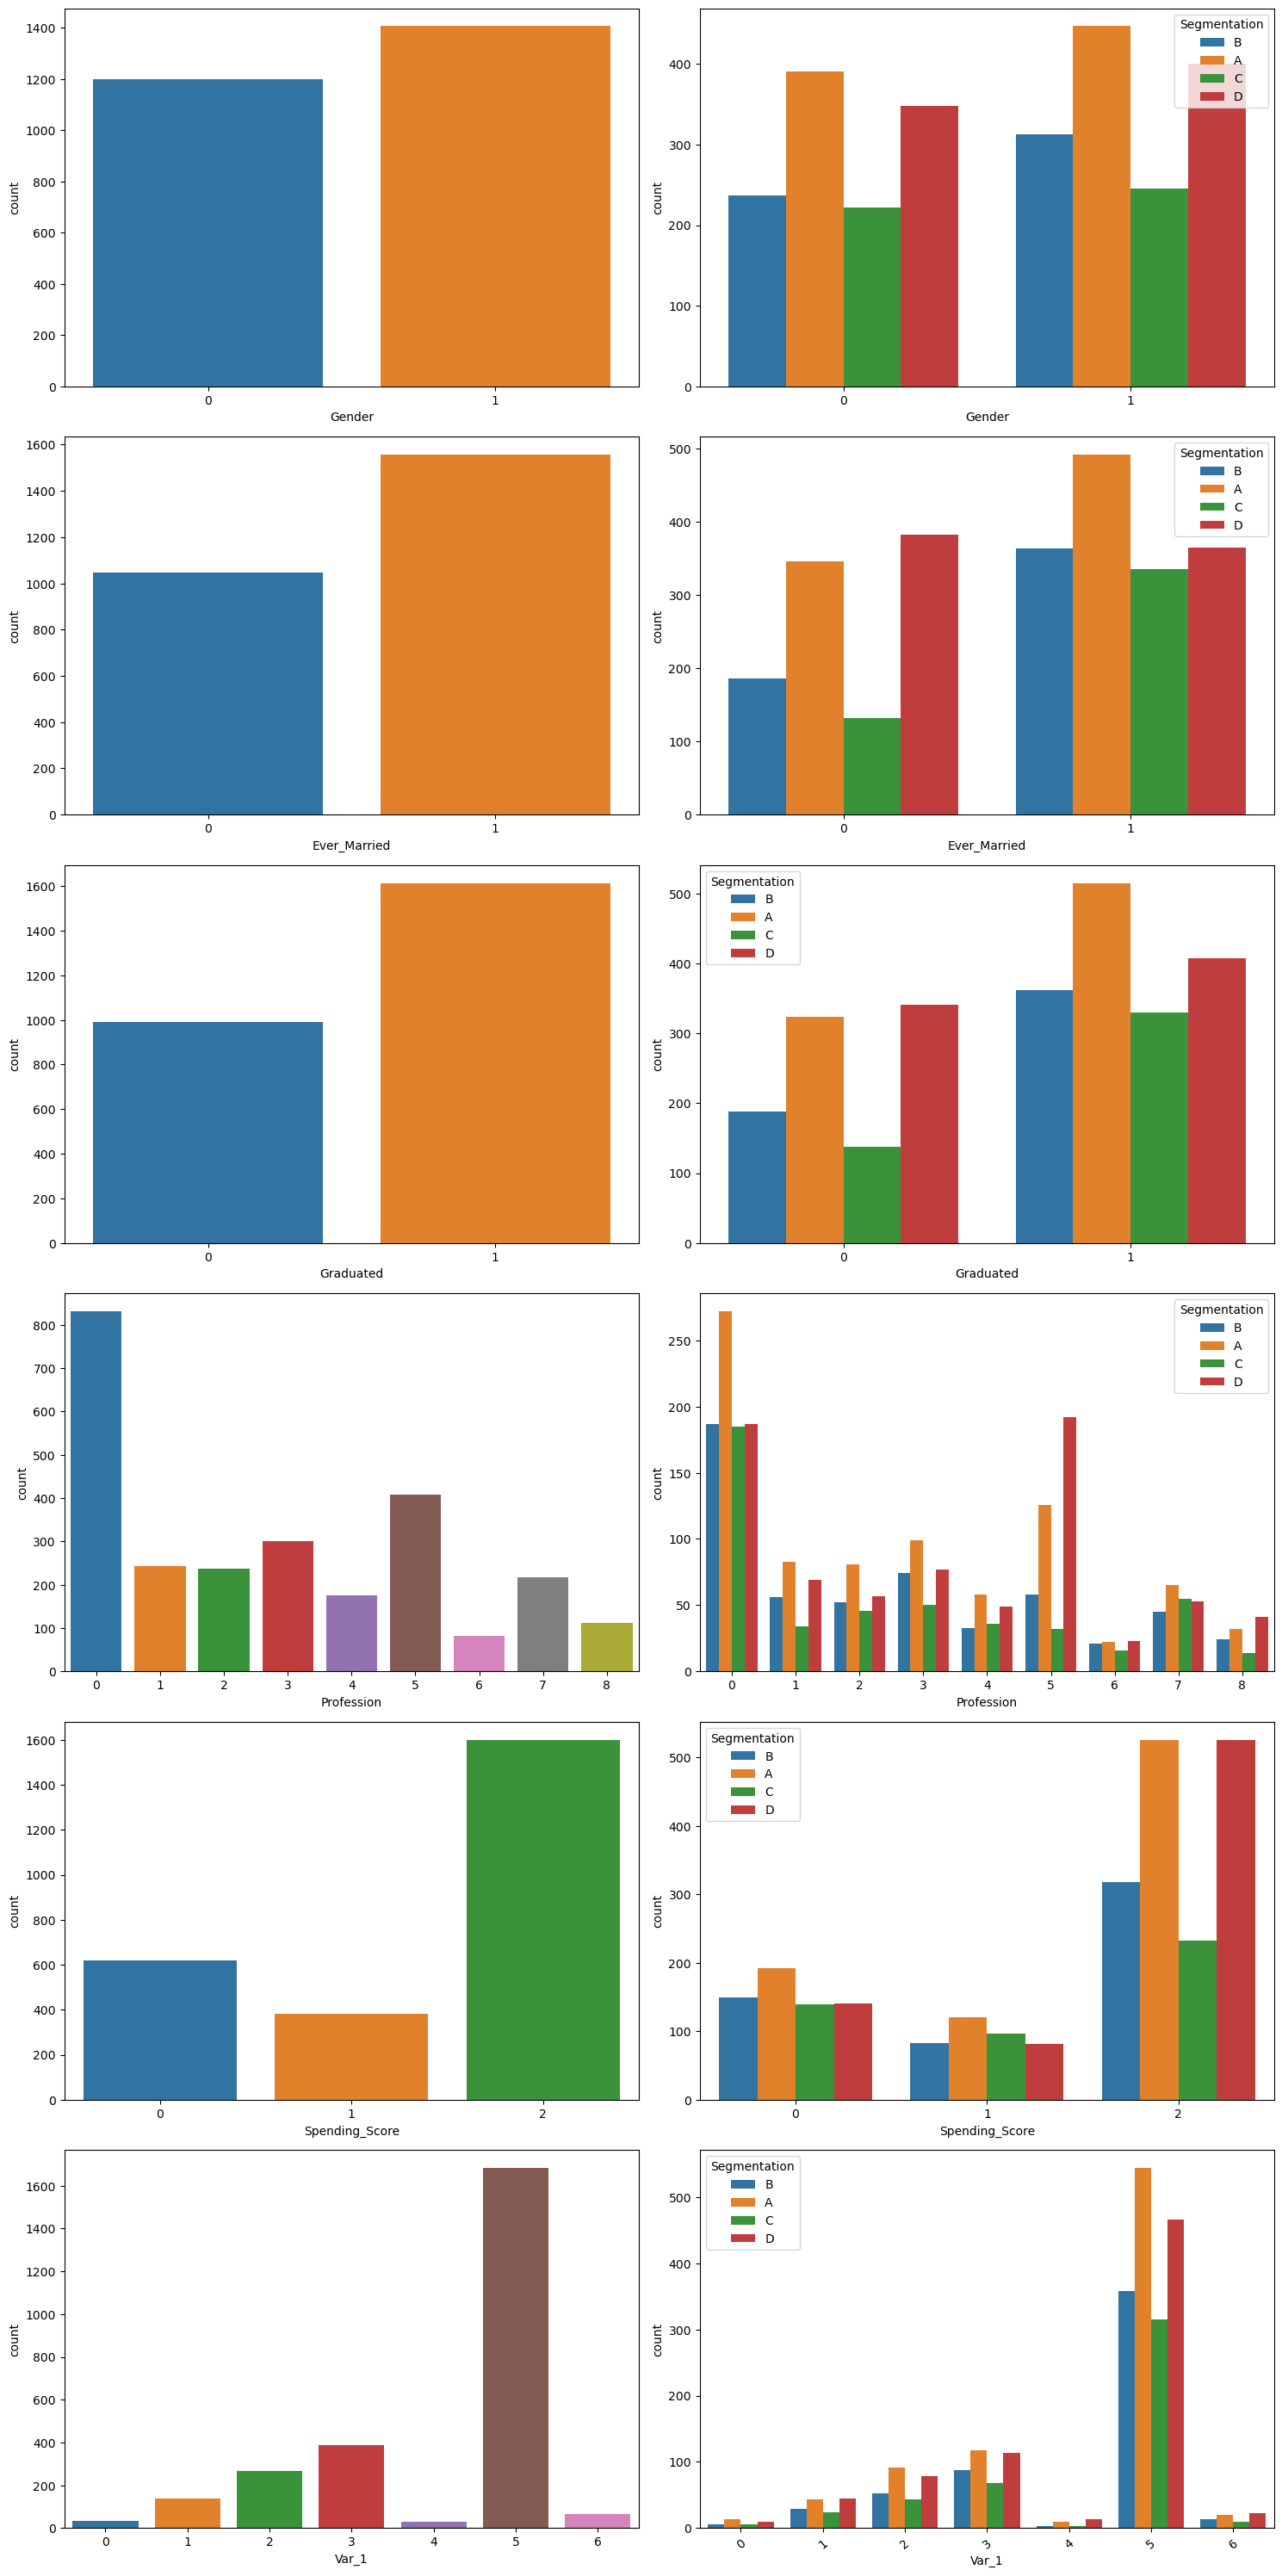

In [31]:
columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

fig, axs = plt.subplots(len(columns), 2, figsize=(15,30))

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df_train, ax=axs[i, 0])
    sns.countplot(x=col, hue='Segmentation', data=df_train, ax=axs[i, 1])

plt.tight_layout()
plt.xticks(rotation=40)
plt.show()

<Axes: >

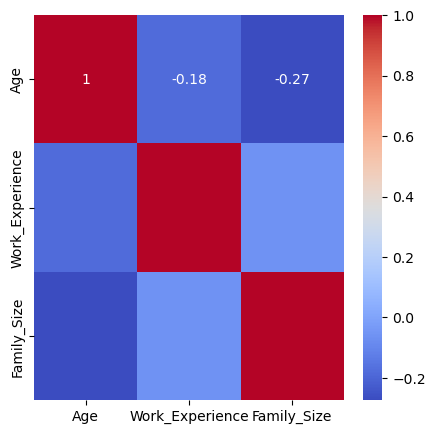

In [32]:
columns = ['Age', 'Work_Experience', 'Family_Size']

# Compute the correlation matrix for the selected columns
corr = df_train[columns].corr()

plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm")


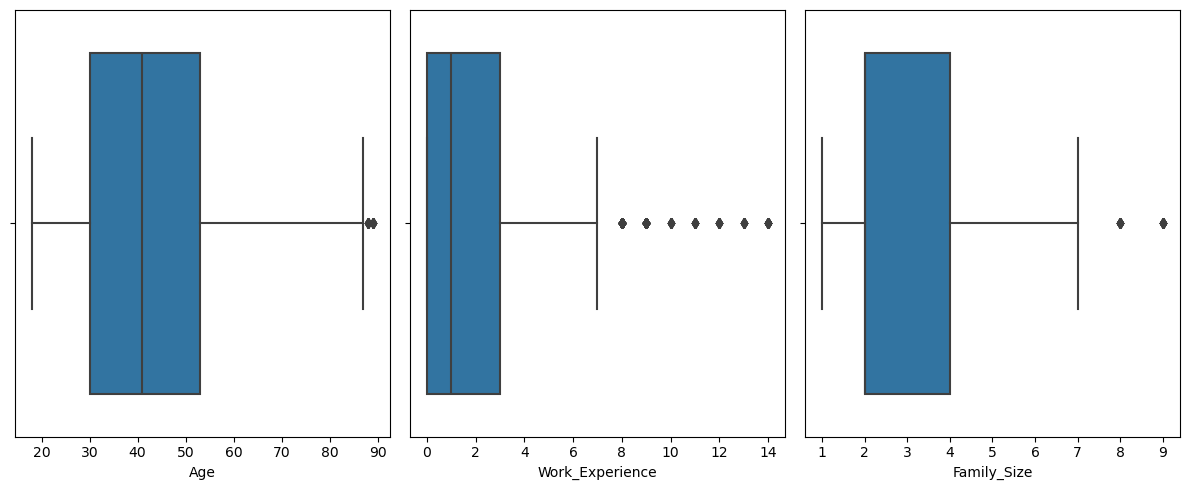

In [33]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df_train['Age'])

plt.subplot(1, 3, 2)
sns.boxplot(x=df_train['Work_Experience'])



plt.subplot(1, 3, 3)
sns.boxplot(x=df_train['Family_Size'])


plt.tight_layout()
plt.show()

<Axes: xlabel='Ever_Married', ylabel='Age'>

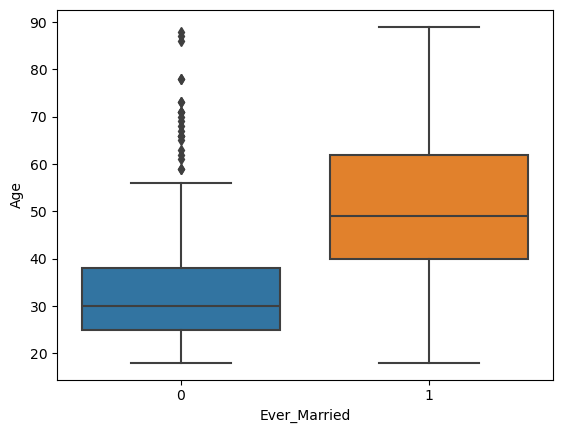

In [34]:
sns.boxplot(df_train,x = 'Ever_Married',y = 'Age')

<Axes: xlabel='Graduated', ylabel='Age'>

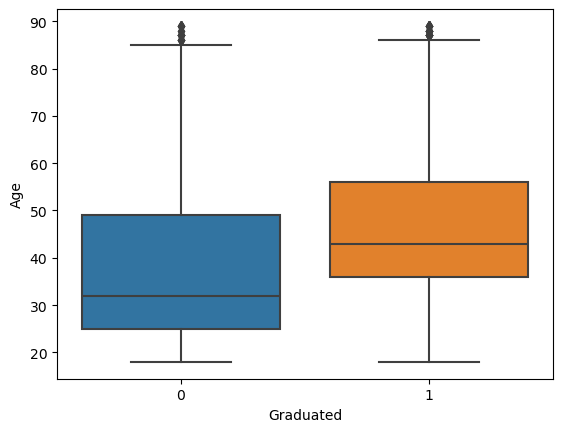

In [35]:
sns.boxplot(df_train,x = 'Graduated',y = 'Age')

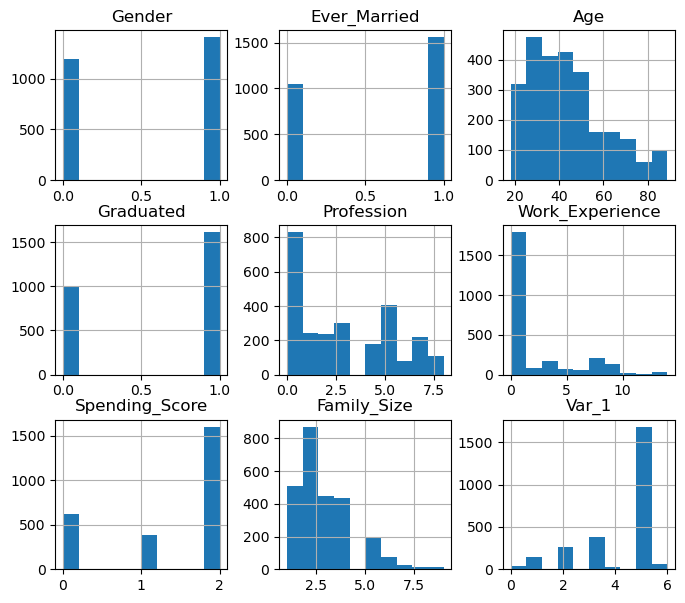

In [36]:
df_train_hist=df_train
df_train_hist= df_train.hist(figsize=(8,7))

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [48]:
# Drop the 'Segmentation' column (or whatever your target column is) from the feature set
X = df_train.drop('Segmentation', axis=1)  # Features: All columns except the target
y = df_train['Segmentation']               # Target: The 'Segmentation' column

In [49]:
#Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Gradient Boosting Model

In [53]:
#Initialize Gradient Boosting model
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

#Train the model on training data
gbc_model.fit(X_train, y_train)

#Make predictions on validation set
y_pred_gbc = gbc_model.predict(X_val)

#calculate accuracy of Gradient Boosting model
gbc_accuracy = accuracy_score(y_val, y_pred_gbc)

#Print classification report 
print("Gradient Boosting Classification Report:")
print(classification_report(y_val, y_pred_gbc))
print(f"Gradient Boosting Overall Accuracy: {gbc_accuracy:.4f}")

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           A       0.32      0.55      0.40       159
           B       0.25      0.13      0.17       117
           C       0.19      0.13      0.16        92
           D       0.42      0.34      0.38       153

    accuracy                           0.32       521
   macro avg       0.29      0.29      0.28       521
weighted avg       0.31      0.32      0.30       521

Gradient Boosting Overall Accuracy: 0.3186


K Nearest Neighbors (KNN) Model

In [50]:
#Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

#Train the model for training data
knn_model.fit(X_train, y_train)

#Make predictions on the validation set
y_pred_knn = knn_model.predict(X_val)

# Calculate the accuracy of the KNN model
knn_accuracy = accuracy_score(y_val, y_pred_knn)

#Print classification report
print("KNN Classification Report:")
print(classification_report(y_val, y_pred_knn))
print(f"KNN Overall Accuracy: {knn_accuracy:.4f}")

KNN Classification Report:
              precision    recall  f1-score   support

           A       0.30      0.47      0.37       159
           B       0.24      0.21      0.22       117
           C       0.27      0.18      0.22        92
           D       0.44      0.31      0.37       153

    accuracy                           0.31       521
   macro avg       0.31      0.29      0.29       521
weighted avg       0.32      0.31      0.31       521

KNN Overall Accuracy: 0.3148


In [58]:
# Initialize and Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf_model.predict(X_val)

# Print classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))

# Calculate and print the overall accuracy of the Random Forest model
rf_accuracy = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Overall Accuracy: {rf_accuracy:.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           A       0.33      0.42      0.37       159
           B       0.23      0.20      0.21       117
           C       0.26      0.18      0.22        92
           D       0.39      0.39      0.39       153

    accuracy                           0.32       521
   macro avg       0.30      0.30      0.29       521
weighted avg       0.31      0.32      0.31       521

Random Forest Overall Accuracy: 0.3167


In [62]:
# Initialize and Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_lr = lr_model.predict(X_val)

# Print classification report for Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_val, y_pred_lr))

# Calculate and print the overall accuracy of the Logistic Regression model
lr_accuracy = accuracy_score(y_val, y_pred_lr)
print(f"Logistic Regression Overall Accuracy: {lr_accuracy:.4f}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           A       0.29      0.58      0.39       159
           B       0.50      0.01      0.02       117
           C       0.26      0.11      0.15        92
           D       0.40      0.41      0.41       153

    accuracy                           0.32       521
   macro avg       0.36      0.28      0.24       521
weighted avg       0.36      0.32      0.27       521

Logistic Regression Overall Accuracy: 0.3205


Accurcay Comparison Chart

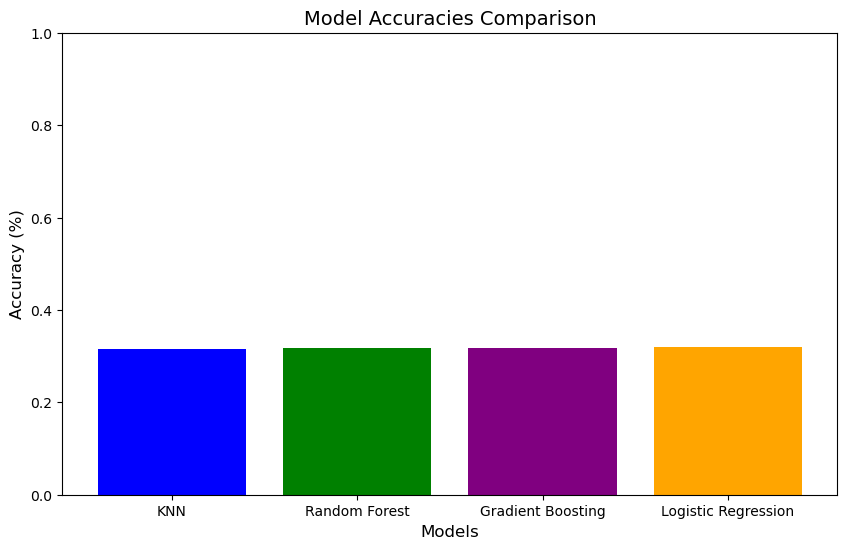

In [63]:
# Define models and their respective accuracies
models = ['KNN', 'Random Forest', 'Gradient Boosting', 'Logistic Regression']
accuracies = [knn_accuracy, rf_accuracy, gbc_accuracy, lr_accuracy]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'purple', 'orange'])

# Add titles and labels
plt.title('Model Accuracies Comparison', fontsize=14)
plt.ylim(0.0, 1.0)  # Adjusted to allow full range of accuracy
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

# Display the chart
plt.show()
